# Faculty Salary Data 
## BACKGROUND

Differences in salaries between men and women at US colleges and 
universities are well documented. Because salary discrimination based on 
sex is illegal in the US, there is considerable controversy over whether 
the differences between male and female faculty members salaries are due 
to sex bias. Other explanations which have been put forward for salary 
disparities between men and women include differences in experience, 
degree attained, the field in which one works, administrative 
responsibilities, and productivity, among others. 

Two general approaches are possible for investigating the presence of 
sex bias. One approach involves attempting to determine whether 
individuals have been victims of bias by examining their particular 
circumstances. The other approach examines salaries at the group level 
and attempts to uncover differences in average salary between groups of 
men and women within an institution. This is the general approach that 
will be used in this analysis. 

There are many factors influencing faculty salaries, and each of these 
may be confounded with sex differences. Market forces are important at 
some universities, i.e., salaries may be determined by the demand for 
experts in certain fields and/or by salaries offered outside the 
university. Thus, higher values may be placed on some fields within the 
university and faculty within those areas will be paid higher salaries. 

Experience is another factor that influences faculty salaries. A faculty 
member's salary tends to increase with the amount of time that person is 
employed at the university. If the faculty member is hired after having 
worked at another institution, then his or her prior experience may be used 
in determining salary. Sometimes salary increases are given when a 
faculty member is promoted from one rank to another, although these 
increases are not necessarily based solely on the promotion.

A faculty member's salary is also influenced by his or her productivity. Many 
different productivity measures can be used, including research grant 
funding, number of papers published, teaching performance, and 
administrative duties, among others. 

## QUESTIONS OF INTEREST

The goal of the analysis is to determine whether sex bias exists and to 
describe the magnitude and nature of the effect. Your analysis should 
revolve around the following specific questions of interest:

    1. Does sex bias exist at the university in the most current year available (1995)?
    2. Has sex bias existed in the starting salaries of faculty members (i.e., salaries in the year hired)?
    3. Has sex bias existed in granting salary increases between 1976 and 1995?
    4. Overall, how would you answer the question: Is there sex bias in salaries at the university? What issues are nvolved in attempting to generalize your results?

In answering these questions be sure you defend the use of each of the 
variables used in your analyses. The data set contains a large number of 
records and this may affect the analysis approaches and methods used as 
well as the interpretation of the results.

## THE DATA

The data to be used in this analysis consist of faculty members' 
salaries at a single US university. Data were collected on 1597 faculty 
members employed at the university in 1995 (medical school faculty were 
excluded). Monthly salary was determined for each faculty member for 
each year from 1976 through 1995. Other variables available include sex, 
highest degree attained, year of highest degree, field, year hired, 
rank, and administrative duties. Note that the last two variables may 
change over time but the others are constant over time.

The file `salary.txt` is in ASCII format with tabs separating the fields 
and can be downloaded from the class web page. Each record in the data 
file represents the information on salary and the other variables for a 
particular year (there are 19792 records). 

### The variable names and description are given below:
| Variable | Description |
| --- | --- |
| case | case number |
| id | identification number for the faculty member |
| sex | M (male) or F (female) |
| deg | highest degree attained: PhD, Prof (professional degree, eg, medicine or law), or Other (Master's or Bachelor's degree) |
| yrdeg | year highest degree attained |
| field | Arts (Arts and Humanities), Prof (professional school, ie, Business, Law, Engineering or Public Affairs), or Other |
| startyr | year in which the faculty member was hired (2 digits) |
| year | year (2 digits) |
| rank | rank of the faculty member in this year: Assist (Assistant), Assoc (Associate), or Full (Full) |
| admin | indicator of whether the faculty member had administrative duties (eg, department chair) in this year: 1 (yes), or 0 (no) |
| salary | monthly salary of the faculty member in this year in dollars |

# JDA Discussion Questions
Dataset to be referred to: http://courses.washington.edu/b517/Datasets/datasets.html
Choose your own dataset for the graph plots that you feel are most feasible.
- Prepare a Jupyter notebook/collab with code samples for creating these charts using visualization packages in Python, such as Matplotlib or Seaborn

## In your presentation the points that need to be included:
- Tell us the background story of the dataset
- What is the use case of your plot? 
- What insight can be derived from this form of the chart?

# Step 1: Extract, Load, and Transform

In [9]:
# import the module

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# extract and load 

df = pd.read_csv('SalaryData.csv')

# check dataframe
df.head()

,case,id,gender,deg,yrdeg,field,startyr,year,rank,admin,salary
0,1,1,F,Other,92,Other,95,95,Assist,0,6684.0
1,2,2,M,Other,91,Other,94,94,Assist,0,4743.0
2,3,2,M,Other,91,Other,94,95,Assist,0,4881.0
3,4,4,M,PhD,96,Other,95,95,Assist,0,4231.0
4,5,6,M,PhD,66,Other,91,91,Full,1,11182.0


In [10]:
# data validation
df.info()
df.isna().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19792 entries, 0 to 19791
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   case     19792 non-null  int64  
 1   id       19792 non-null  int64  
 2   gender   19792 non-null  object 
 3   deg      19792 non-null  object 
 4   yrdeg    19792 non-null  int64  
 5   field    19792 non-null  object 
 6   startyr  19792 non-null  int64  
 7   year     19792 non-null  int64  
 8   rank     19788 non-null  object 
 9   admin    19792 non-null  int64  
 10  salary   19792 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 1.7+ MB


,case,id,yrdeg,startyr,year,admin,salary
count,19792.0000,19792.000000,19792.000000,19792.000000,19792.000000,19792.000000,19792.000000
mean,9896.5000,883.503739,72.106760,76.072201,87.432346,0.105042,4721.823453
std,5713.6026,505.710683,8.504135,8.951341,5.556229,0.306616,1986.705277
min,1.0000,1.000000,48.000000,48.000000,76.000000,0.000000,1200.000000
25%,4948.7500,461.000000,67.000000,69.000000,83.000000,0.000000,3287.000000
50%,9896.5000,873.000000,72.000000,76.000000,88.000000,0.000000,4353.000000
75%,14844.2500,1315.000000,78.000000,83.000000,92.000000,0.000000,5794.000000
max,19792.0000,1770.000000,96.000000,95.000000,95.000000,1.000000,14464.000000


In [11]:
# Data Clean
df.dropna(subset=['rank'], inplace=True)
df.isna().sum()

case       0
id         0
gender     0
deg        0
yrdeg      0
field      0
startyr    0
year       0
rank       0
admin      0
salary     0
dtype: int64

# Plot Regresssion using Seaborn
```python
seaborn.regplot(data=None, *, x=None, y=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
```

Text(0, 0.5, 'Salary')

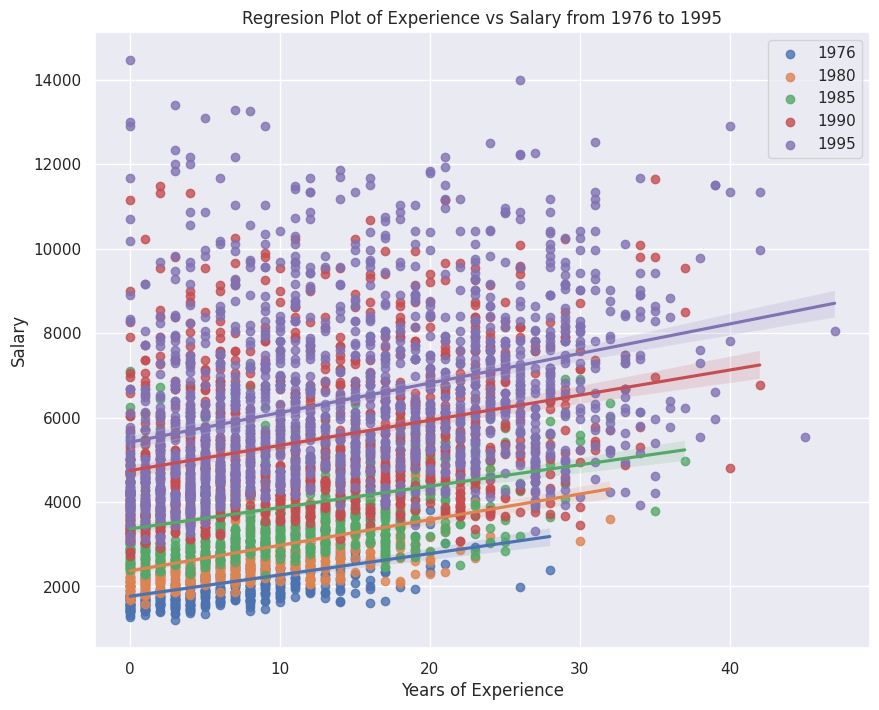

In [99]:
# Create subplots for three different years when data was recorded 1976, 1986, 1995
df['exp'] = df['year'] - df['startyr']


grouped = df.groupby('year')


grouped_95 = grouped.get_group(95)
grouped_90 = grouped.get_group(90)
grouped_85 = grouped.get_group(85)
grouped_80 = grouped.get_group(80)
grouped_76 = grouped.get_group(76)


# create plot
sns.regplot(data=grouped_76,x='exp',y='salary',label='1976')
sns.regplot(data=grouped_80,x='exp',y='salary',label='1980')
sns.regplot(data=grouped_85,x='exp',y='salary',label='1985')
sns.regplot(data=grouped_90,x='exp',y='salary',label='1990')
sns.regplot(data=grouped_95,x='exp',y='salary',label='1995')
sns.set(rc={"figure.figsize":(10, 8)})
plt.title('Regresion Plot of Experience vs Salary from 1976 to 1995')
plt.legend()
plt.xlabel('Years of Experience')
plt.ylabel('Salary')